## Initialization
Download the datasets, the trained model, and sets up the envoirement

In [3]:
%%capture
from scipy.io import loadmat
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#Download data on virtual machine
!wget -nc http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget -nc http://ufldl.stanford.edu/housenumbers/test_32x32.mat
!wget -nc https://github.com/ferrettindr/cnn-svhn/raw/master/saved_model/model_part_aa
!wget -nc https://github.com/ferrettindr/cnn-svhn/raw/master/saved_model/model_part_ab
!wget -nc https://github.com/ferrettindr/cnn-svhn/raw/master/saved_model/model_part_ac
!wget -nc https://github.com/ferrettindr/cnn-svhn/raw/master/saved_model/model_part_ad
!wget -nc https://github.com/ferrettindr/cnn-svhn/raw/master/saved_model/model_part_ae

#Join the tar file for the model and unpack it
!cat model_part_* > model.tar
!tar -xf model.tar

#Delete useless files
!rm model_part_*
!rm model.tar


TRAIN_PATH = 'train_32x32.mat'
TEST_PATH = 'test_32x32.mat'

#load the trained model
model = models.load_model('saved_model.hd5')


#load the dataset
train = loadmat(TRAIN_PATH)
test = loadmat(TEST_PATH)
train_img, train_lbs = train['X'], train['y']
test_img, test_lbs = test['X'], test['y']

train_img = np.transpose(train_img,[3,0,1,2])
test_img = np.transpose(test_img,[3,0,1,2])
#non normalized images used for visualization
images = np.copy(test_img)

train_lbs = np.where(train_lbs!=10, train_lbs, 0)
test_lbs = np.where(test_lbs!= 10, test_lbs, 0)

def rgb_to_gray(rgb):
    r,g,b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989*r+0.5870*g+0.1140*b
    return gray.reshape(rgb.shape[0], rgb.shape[1], rgb.shape[2], 1)

train_img = rgb_to_gray(train_img)
test_img = rgb_to_gray(test_img)


#normalization
train_mean = np.mean(train_img)
train_img = train_img - train_mean
train_std = np.std(train_img)
train_img = train_img / train_std
test_img = test_img - train_mean
test_img = test_img / train_std


#Function to visualize images with their respective labels and predictions
def plot_img(images, labels, predictions, title='', rows=1, cols=8):
    fig = plt.figure(figsize=(20,17))
    fig.suptitle('\n'+title, fontsize=40, weight='bold')
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i,:,:,:])
        # The labels happen to be arrays, 
        # which is why you need the extra index
        c= ('r' if predictions[i][0] != labels[i][0] else 'g')
        plt.xlabel('True label: '+str(labels[i][0])+'\nPrediction: '+str(predictions[i][0]), fontsize=20, color=c)
    plt.show()
    


## Demo
The 32 by 32 pixels images are centered around the digit they represent, other digits are not taken into account.  
The following code will choose randomly 20 images from the testset and make the model predict them.  
The predictions are compared to the correct label and printed in red if there's a mistake.  
The model has an accuracy of 96% on the testset thus around 1 wrong prediction every 20 images is expected.  
The testset presents some mislabeling so there may be cases where the label is incorrect.

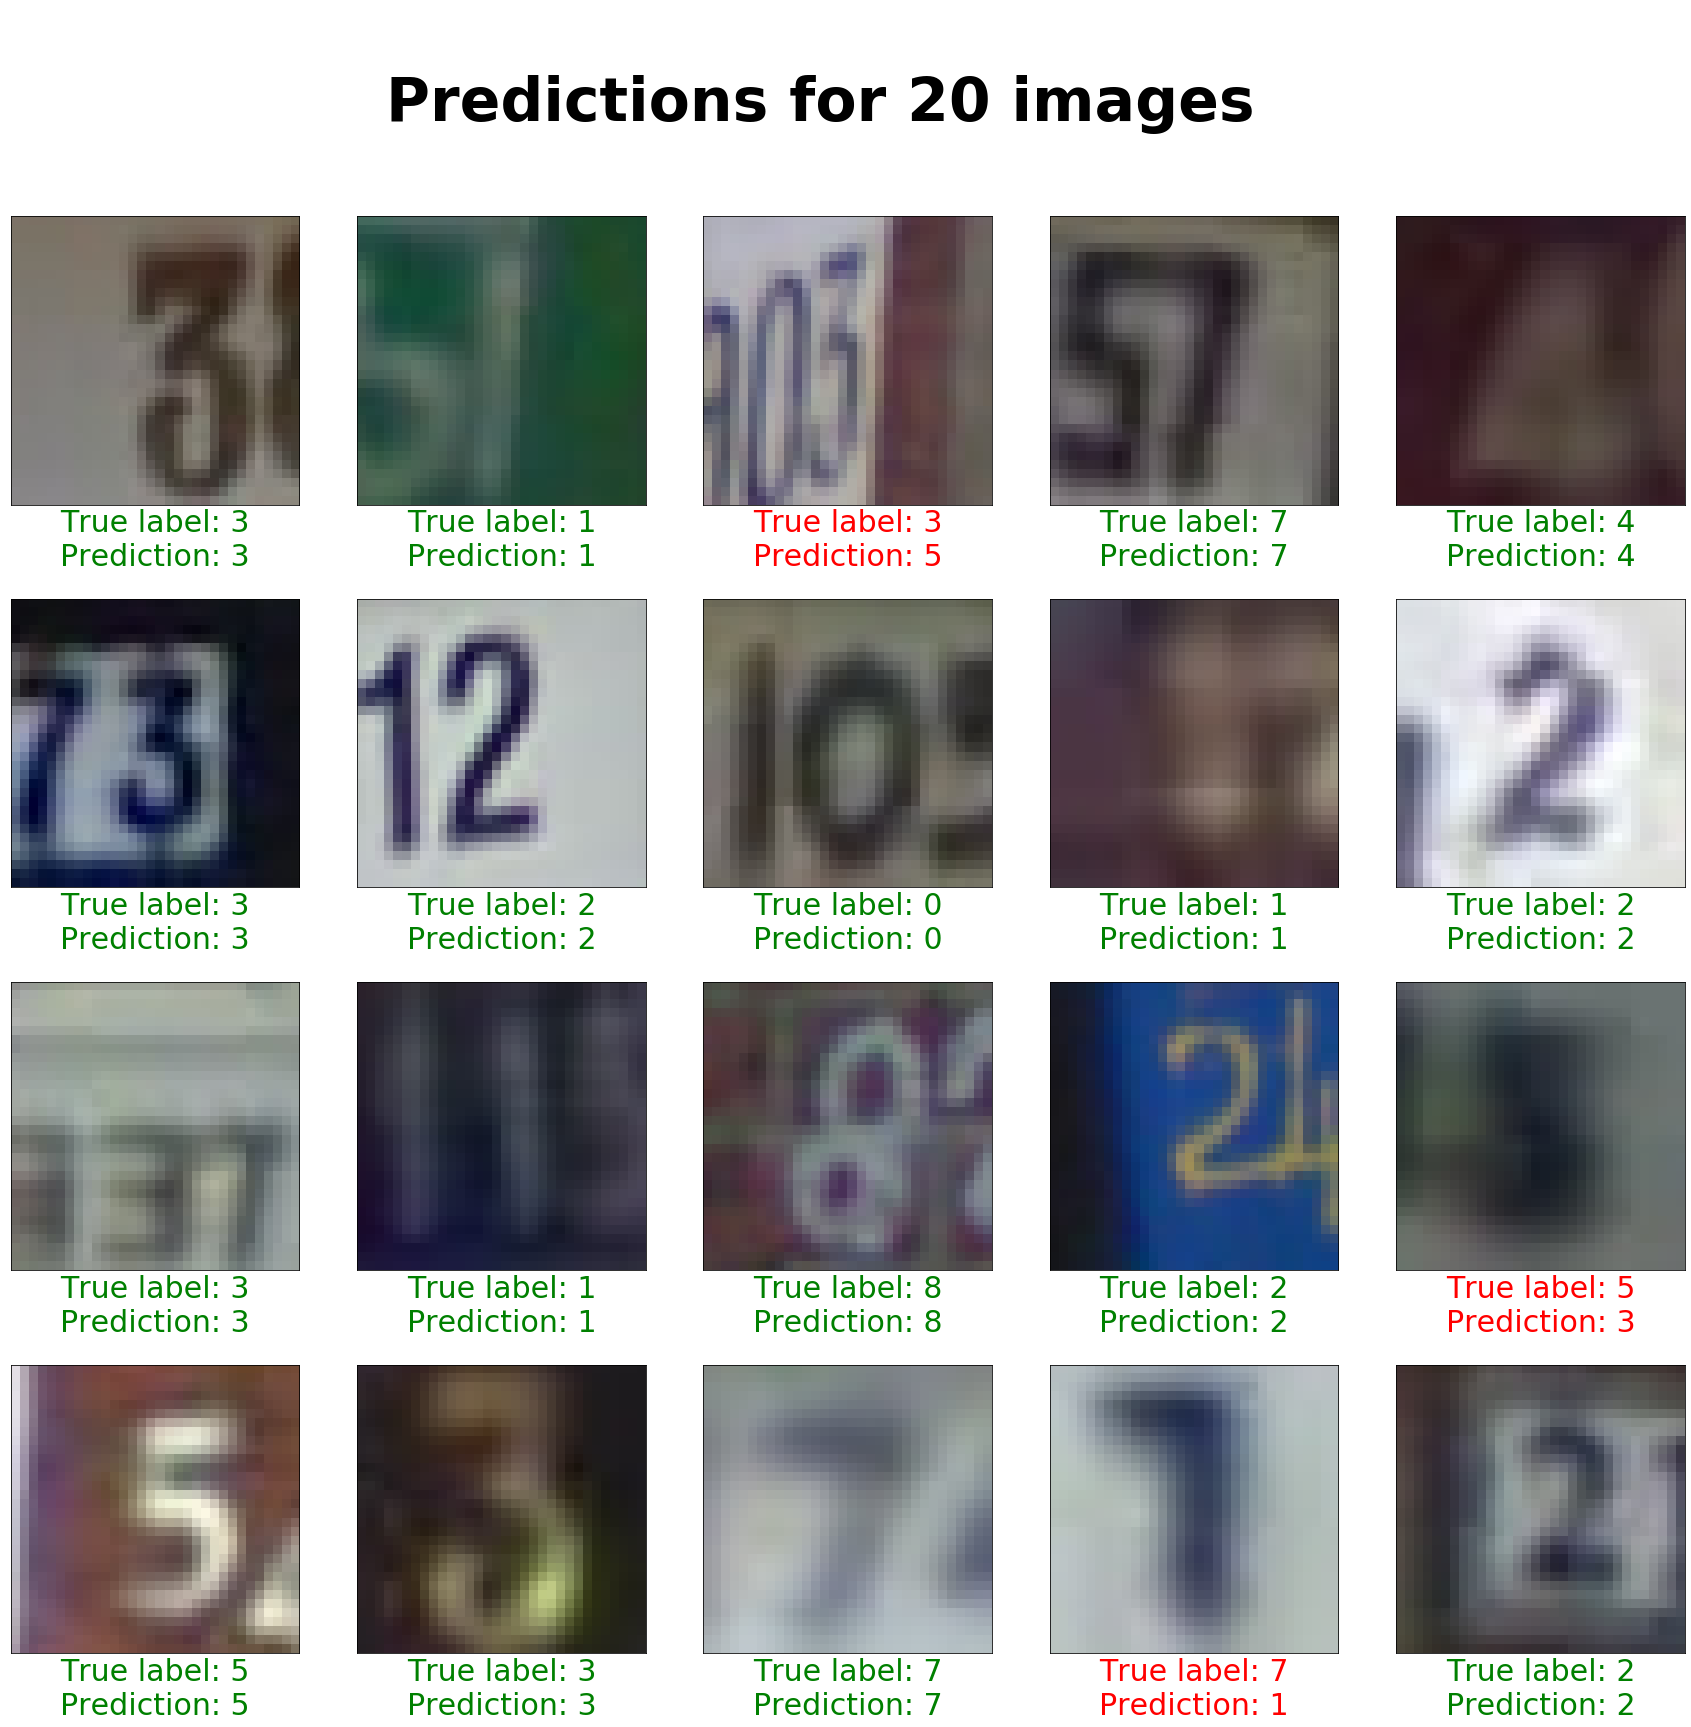

In [243]:
picked_images = np.random.choice(test_lbs.shape[0], 20)
res = model.predict(test_img[picked_images])
predictions = np.reshape(np.argmax(res, axis=1), (20,1))
plot_img(images[picked_images], test_lbs[picked_images], predictions,'Predictions for 20 images', rows=4, cols=5)